## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


!pip install pipwin
!pipwin install gdal
!pipwin install fiona
!pip install geopandas

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split






In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df
#df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
min(df['quarter'])

Period('2014Q2', 'Q-DEC')

In [7]:
max(df['quarter'])

Period('2015Q2', 'Q-DEC')

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014Q4
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014Q4
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015Q1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014Q4
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014Q2
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015Q1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014Q2
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015Q1


In [9]:
df.zipcode.nunique()

70

In [10]:
df1 = pd.read_csv('data/uszips.csv')
df1.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [11]:
df1.describe()

,zip,lat,lng,parent_zcta,population,density,county_fips
count,33788.000000,33788.000000,33788.000000,0.0,32714.000000,32714.000000,33788.000000
mean,49704.075944,38.800232,-90.955757,NaN,10075.731033,505.597958,29989.669320
std,27559.943384,5.388742,15.666743,NaN,14857.175713,1921.615562,15507.819923
min,601.000000,-14.219840,-176.629620,NaN,0.000000,0.000000,1001.000000
25%,26721.500000,35.362585,-97.226137,NaN,738.000000,7.600000,18057.000000
50%,49724.500000,39.476165,-88.183660,NaN,2906.500000,30.700000,30031.000000
75%,72170.750000,42.103822,-80.237112,NaN,13761.000000,268.750000,42055.000000
max,99929.000000,71.274340,145.753490,NaN,126310.000000,61244.700000,78030.000000


/Users/lindstromkyle/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

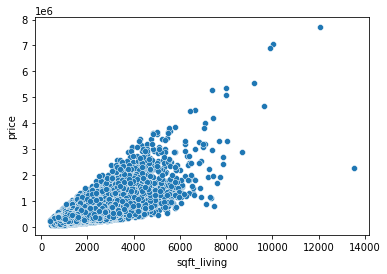

In [12]:
sns.scatterplot(df['sqft_living'], df['price'])

/Users/lindstromkyle/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_above', ylabel='price'>

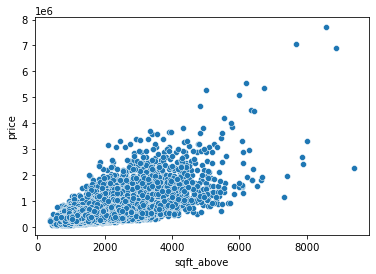

In [13]:
sns.scatterplot(df['sqft_above'], df['price'])

/Users/lindstromkyle/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

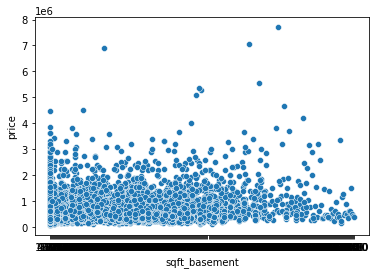

In [14]:
sns.scatterplot(df['sqft_basement'], df['price'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [16]:
#df_preds = df.drop(['price','date','waterfront', 'view', 'condition', 'grade', 'sqft_basement','date','yr_renovated','id'], axis =1)
#df_target = df['price']
#ss = StandardScaler().fit(df_preds)
#df_preds_scaled = pd.DataFrame(ss.transform(df_preds), columns=df_preds.columns)
#df_preds_scaled
#predictors = sm.add_constant(df_preds_scaled)
#predictors.info()

In [17]:
#df_preds_scaled

In [18]:
#model = sm.OLS(df_target, predictors).fit()

In [19]:
#model.summary()

In [20]:
df2 = pd.read_csv('data/ATNHPIUS53033A.csv')
df2['DATE'] = pd.to_datetime(df2['DATE'])
df2["year_month"] = df2["DATE"].dt.strftime('%Y-%m')
df2

,DATE,ATNHPIUS53033A_CHG,year_month
0,1976-01-01,1.87,1976-01
1,1977-01-01,3.21,1977-01
2,1978-01-01,5.12,1978-01
3,1979-01-01,4.14,1979-01
4,1980-01-01,3.57,1980-01
5,1981-01-01,1.64,1981-01
6,1982-01-01,-3.23,1982-01
7,1983-01-01,3.43,1983-01
8,1984-01-01,1.08,1984-01
9,1985-01-01,0.95,1985-01


In [21]:
df3 = pd.read_csv('data/WASTHPI.csv')
df3['quarter'] = pd.PeriodIndex(df3.DATE, freq='Q')
df3

,DATE,WASTHPI_CHG,quarter
0,1975-04-01,0.95,1975Q2
1,1975-07-01,2.53,1975Q3
2,1975-10-01,-1.66,1975Q4
3,1976-01-01,2.28,1976Q1
4,1976-04-01,3.28,1976Q2
...,...,...,...
184,2021-04-01,56.72,2021Q2
185,2021-07-01,46.23,2021Q3
186,2021-10-01,28.10,2021Q4
187,2022-01-01,38.76,2022Q1


In [22]:
df_master = df.merge(df3, on = 'quarter' )
df_master

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter,DATE,WASTHPI_CHG
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014Q4,2014-10-01,4.34
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014Q4,2014-10-01,4.34
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014Q4,2014-10-01,4.34
3,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,NO,NONE,...,1977,0.0,98074,47.6127,-122.045,1370,10208,2014Q4,2014-10-01,4.34
4,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,1921,0.0,98002,47.3089,-122.210,1060,5095,2014Q4,2014-10-01,4.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3832050760,2014-08-28,270000.0,3,2.50,1870,5000,2.0,NO,NONE,...,2009,0.0,98042,47.3339,-122.055,2170,5399,2014Q3,2014-07-01,9.28
21593,7570050450,2014-09-10,347500.0,3,2.50,2540,4760,2.0,NO,NONE,...,2010,0.0,98038,47.3452,-122.022,2540,4571,2014Q3,2014-07-01,9.28
21594,7502800100,2014-08-13,679950.0,5,2.75,3600,9437,2.0,NO,NONE,...,2014,0.0,98059,47.4822,-122.131,3550,9421,2014Q3,2014-07-01,9.28
21595,7202300110,2014-09-15,810000.0,4,3.00,3990,7838,2.0,NO,NONE,...,2003,NaN,98053,47.6857,-122.046,3370,6814,2014Q3,2014-07-01,9.28


In [23]:
df_master['age'] = 2022 - df['yr_built']
df_master


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter,DATE,WASTHPI_CHG,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,2014Q4,2014-10-01,4.34,67
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,47.7210,-122.319,1690,7639,2014Q4,2014-10-01,4.34,71
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,47.5208,-122.393,1360,5000,2014Q4,2014-10-01,4.34,89
3,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,NO,NONE,...,0.0,98074,47.6127,-122.045,1370,10208,2014Q4,2014-10-01,4.34,57
4,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,0.0,98002,47.3089,-122.210,1060,5095,2014Q4,2014-10-01,4.34,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3832050760,2014-08-28,270000.0,3,2.50,1870,5000,2.0,NO,NONE,...,0.0,98042,47.3339,-122.055,2170,5399,2014Q3,2014-07-01,9.28,13
21593,7570050450,2014-09-10,347500.0,3,2.50,2540,4760,2.0,NO,NONE,...,0.0,98038,47.3452,-122.022,2540,4571,2014Q3,2014-07-01,9.28,8
21594,7502800100,2014-08-13,679950.0,5,2.75,3600,9437,2.0,NO,NONE,...,0.0,98059,47.4822,-122.131,3550,9421,2014Q3,2014-07-01,9.28,13
21595,7202300110,2014-09-15,810000.0,4,3.00,3990,7838,2.0,NO,NONE,...,NaN,98053,47.6857,-122.046,3370,6814,2014Q3,2014-07-01,9.28,18


In [24]:
df_master.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,WASTHPI_CHG,age
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,0.010078,-0.008745
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.029937,-0.013473
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.004357,-0.013547
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,0.016178,-0.024491
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,0.011553,-0.013096
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.003959,0.020301
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.007849,-0.025642
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.008931,-0.012891
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777,0.005623,-0.031042
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852,0.002631,0.000579


In [25]:
np.cov(df_master.yr_built, df_master.age, ddof=0)[0][1]

-26.78483112150608

In [26]:
df_master.age.std()

29.375234132441637

In [27]:
df_master = df_master.drop(['sqft_living15','sqft_lot15','view', 'condition','yr_renovated','sqft_basement', 'waterfront','grade','id','DATE'], axis =1)
df_master['year'] = pd.PeriodIndex(df_master.date, freq='Y')
#df_preds2 = df_preds1.drop(['quarter','year','date','zipcode','price'], axis =1)
df_master_no_object = df_master.drop(['year', 'quarter','date'], axis = 1)

In [28]:
df_master_no_object.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   sqft_above   21597 non-null  int64  
 7   yr_built     21597 non-null  int64  
 8   zipcode      21597 non-null  int64  
 9   lat          21597 non-null  float64
 10  long         21597 non-null  float64
 11  WASTHPI_CHG  21597 non-null  float64
 12  age          21597 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


In [29]:
df_target1 = np.log(df_master_no_object['price'])
ss = StandardScaler().fit(df_master_no_object)
df_master_scaled = pd.DataFrame(ss.transform(df_master_no_object), columns=df_master_no_object.columns)
predictors1 = sm.add_constant(df_master_no_object)
predictors2 = predictors1.drop(['zipcode', 'lat', 'long','price'], axis = 1)

df_master_scaled = sm.add_constant(df_master_scaled)
df_master_scaled_no_object = df_master_scaled.drop(['zipcode', 'lat', 'long','price'], axis = 1)

In [30]:
model1 = sm.OLS(df_target1, df_master_scaled_no_object).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2849.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:17:37   Log-Likelihood:                -8337.3
No. Observations:               21597   AIC:                         1.669e+04
Df Residuals:                   21587   BIC:                         1.677e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0482      0.002   5385.533      0.000      13.043      13.053
bedrooms       -0.0606      0.003    -19.964      0.000      -0.067      -0.055
bathrooms       0.0874      0.004     19.964      0.000       0.079       0.096
sqft_living     0.3675      0.006     56.903      0.000       0.355       0.380
sqft_lot       -0.0059      0.002     -2.358      0.018      -0.011      -0.001
floors          0.0773      0.003     23.497      0.000       0.071       0.084
sqft_above     -0.0165      0.006     -2.783      0.005      -0.028      -0.005
yr_built       -0.1401      0.003    -45.921      0.000      -0.146      -0.134
WASTHPI_CHG     0.0182      0.002      7.506      0.000       0.013       0.023
age            -0.0027      0.002     -1.123      0.261      -0.007       0.002
==============================================================================
Omnibus:                      249.005   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.559
Skew:                          -0.106   Prob(JB):                     1.55e-85
Kurtosis:                       3.624   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:

df4 = pd.read_csv('data/ACSST5Y2015.S1901-Data.csv')
df4 = df4[['NAME','S1901_C01_001E']]
df4

,NAME,S1901_C01_001E
0,Geographic Area Name,Households!!Estimate!!Total
1,ZCTA5 98001,11109
2,ZCTA5 98002,12687
3,ZCTA5 98003,17791
4,ZCTA5 98004,15518
...,...,...
595,ZCTA5 99371,174
596,ZCTA5 99401,117
597,ZCTA5 99402,734
598,ZCTA5 99403,8510


In [32]:
df4['NAME'] = df4.NAME.str.split(' ').str[1]
df4 = df4.drop([0, 599])
df4['year'] = '2015'
df4=df4.rename(columns={"NAME": "zipcode"})
df4.columns

Index(['zipcode', 'S1901_C01_001E', 'year'], dtype='object')

In [33]:
df_master.zipcode = df_master.zipcode.astype(str)
df_master.year = df_master.year.astype(str)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         21597 non-null  datetime64[ns]
 1   price        21597 non-null  float64       
 2   bedrooms     21597 non-null  int64         
 3   bathrooms    21597 non-null  float64       
 4   sqft_living  21597 non-null  int64         
 5   sqft_lot     21597 non-null  int64         
 6   floors       21597 non-null  float64       
 7   sqft_above   21597 non-null  int64         
 8   yr_built     21597 non-null  int64         
 9   zipcode      21597 non-null  object        
 10  lat          21597 non-null  float64       
 11  long         21597 non-null  float64       
 12  quarter      21597 non-null  period[Q-DEC] 
 13  WASTHPI_CHG  21597 non-null  float64       
 14  age          21597 non-null  int64         
 15  year         21597 non-null  object        
dtypes: d

In [34]:
df_income_2015 = df_master.merge(df4, on = ['zipcode','year'])
df_income_2015

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,quarter,WASTHPI_CHG,age,year,S1901_C01_001E
0,2015-02-25,180000.0,2,1.00,770,10000,1.0,770,1933,98028,47.7379,-122.233,2015Q1,5.95,32,2015,8027
1,2015-01-27,530000.0,4,2.50,2320,5493,2.0,2320,2004,98028,47.7727,-122.229,2015Q1,5.95,59,2015,8027
2,2015-03-20,595000.0,5,2.75,3740,6750,1.0,1980,1978,98028,47.7679,-122.261,2015Q1,5.95,64,2015,8027
3,2015-03-27,450000.0,3,1.00,1160,36831,1.0,1160,1938,98028,47.7507,-122.237,2015Q1,5.95,39,2015,8027
4,2015-03-05,306000.0,3,1.00,1190,10350,1.0,1190,1959,98028,47.7428,-122.244,2015Q1,5.95,76,2015,8027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,2015-04-22,339950.0,3,2.50,1730,4286,2.0,1730,1999,98148,47.4320,-122.329,2015Q2,13.08,51,2015,4260
6971,2015-04-16,415000.0,4,2.50,2670,8279,2.0,2670,1999,98148,47.4292,-122.328,2015Q2,13.08,44,2015,4260
6972,2015-04-13,235000.0,2,1.00,930,10505,1.0,930,1930,98148,47.4337,-122.329,2015Q2,13.08,94,2015,4260
6973,2015-04-23,330000.0,4,2.25,2000,10679,1.0,1350,1960,98148,47.4238,-122.329,2015Q2,13.08,18,2015,4260


In [35]:
df5 = pd.read_csv('data/ACSST5Y2014.S1903-Data.csv')
df5 = df5[['NAME','S1903_C02_001E']]
df5['NAME'] = df5.NAME.str.split(' ').str[1]
df5 = df5.drop([0, 599])
df5

,NAME,S1903_C02_001E
1,98001,72540
2,98002,44930
3,98003,45563
4,98004,100344
5,98005,85639
...,...,...
594,99363,-
595,99371,53000
596,99401,62396
597,99402,53438


In [36]:
df5['year'] = '2014'
df5=df5.rename(columns={"NAME": "zipcode"})
df5=df5.rename(columns={"S1903_C02_001E": "S1901_C01_001E"})
df5.columns

Index(['zipcode', 'S1901_C01_001E', 'year'], dtype='object')

In [37]:
df_income_2014 = df_master.merge(df5, on = ['zipcode','year'])
df_income_2014

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,quarter,WASTHPI_CHG,age,year,S1901_C01_001E
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1180,1955,98178,47.5112,-122.257,2014Q4,4.34,67,2014,59637
1,2014-12-29,239900.0,4,1.00,1000,7134,1.0,1000,1943,98178,47.4897,-122.240,2014Q4,4.34,20,2014,59637
2,2014-12-31,260000.0,3,1.00,1180,5350,1.5,1180,1959,98178,47.5050,-122.259,2014Q4,4.34,54,2014,59637
3,2014-12-15,252500.0,3,2.00,1150,6000,1.0,1150,1956,98178,47.4980,-122.263,2014Q4,4.34,44,2014,59637
4,2014-12-29,790000.0,4,1.75,2460,10061,1.0,1410,1961,98178,47.5105,-122.238,2014Q4,4.34,69,2014,59637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14617,2014-08-12,2190000.0,4,4.50,4240,13162,2.0,4240,2004,98039,47.6193,-122.229,2014Q3,9.28,8,2014,182308
14618,2014-07-08,2460000.0,4,5.25,6500,14986,2.0,5180,2001,98039,47.6304,-122.236,2014Q3,9.28,8,2014,182308
14619,2014-08-01,1350000.0,3,2.00,2070,9600,1.0,1590,1946,98039,47.6160,-122.239,2014Q3,9.28,9,2014,182308
14620,2014-07-09,2680000.0,5,3.00,4290,20445,2.0,4290,1985,98039,47.6217,-122.239,2014Q3,9.28,16,2014,182308


In [38]:
df_income = pd.concat([df_income_2014,df_income_2015], axis = 0)
df_income.S1901_C01_001E = df_income.S1901_C01_001E.astype(int)
df_income = df_income.reset_index().drop('index', axis=1)
df_income = sm.add_constant(df_income)
df_income.quarter = df_income.quarter.astype(str)


df_income.columns

Index(['const', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'zipcode', 'lat',
       'long', 'quarter', 'WASTHPI_CHG', 'age', 'year', 'S1901_C01_001E'],
      dtype='object')

In [39]:
df_income

,const,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,quarter,WASTHPI_CHG,age,year,S1901_C01_001E
0,1.0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1180,1955,98178,47.5112,-122.257,2014Q4,4.34,67,2014,59637
1,1.0,2014-12-29,239900.0,4,1.00,1000,7134,1.0,1000,1943,98178,47.4897,-122.240,2014Q4,4.34,20,2014,59637
2,1.0,2014-12-31,260000.0,3,1.00,1180,5350,1.5,1180,1959,98178,47.5050,-122.259,2014Q4,4.34,54,2014,59637
3,1.0,2014-12-15,252500.0,3,2.00,1150,6000,1.0,1150,1956,98178,47.4980,-122.263,2014Q4,4.34,44,2014,59637
4,1.0,2014-12-29,790000.0,4,1.75,2460,10061,1.0,1410,1961,98178,47.5105,-122.238,2014Q4,4.34,69,2014,59637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,2015-04-22,339950.0,3,2.50,1730,4286,2.0,1730,1999,98148,47.4320,-122.329,2015Q2,13.08,51,2015,4260
21593,1.0,2015-04-16,415000.0,4,2.50,2670,8279,2.0,2670,1999,98148,47.4292,-122.328,2015Q2,13.08,44,2015,4260
21594,1.0,2015-04-13,235000.0,2,1.00,930,10505,1.0,930,1930,98148,47.4337,-122.329,2015Q2,13.08,94,2015,4260
21595,1.0,2015-04-23,330000.0,4,2.25,2000,10679,1.0,1350,1960,98148,47.4238,-122.329,2015Q2,13.08,18,2015,4260


# Train-Test Split

In [40]:
X_train = df_income[df_income.year == '2014'].drop(['date','price','zipcode','lat','long','quarter','year','sqft_above'], axis =1)
Y_train = df_income.price[df_income.year == '2014']

X_test = df_income[df_income.year == '2015'].drop(['date','price','zipcode','lat','long','quarter','year','sqft_above'], axis =1)
Y_test = df_income.price[df_income.year == '2015']


In [41]:
df_preds_income = X_train
df_preds_income

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,WASTHPI_CHG,age,S1901_C01_001E
0,1.0,3,1.00,1180,5650,1.0,1955,4.34,67,59637
1,1.0,4,1.00,1000,7134,1.0,1943,4.34,20,59637
2,1.0,3,1.00,1180,5350,1.5,1959,4.34,54,59637
3,1.0,3,2.00,1150,6000,1.0,1956,4.34,44,59637
4,1.0,4,1.75,2460,10061,1.0,1961,4.34,69,59637
...,...,...,...,...,...,...,...,...,...,...
14617,1.0,4,4.50,4240,13162,2.0,2004,9.28,8,182308
14618,1.0,4,5.25,6500,14986,2.0,2001,9.28,8,182308
14619,1.0,3,2.00,2070,9600,1.0,1946,9.28,9,182308
14620,1.0,5,3.00,4290,20445,2.0,1985,9.28,16,182308


In [42]:

#living = sm.add_constant(df['sqft_living'])
model2 = sm.OLS(np.log(Y_train), df_preds_income).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2716.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:17:38   Log-Likelihood:                -4176.0
No. Observations:               14622   AIC:                             8372.
Df Residuals:                   14612   BIC:                             8448.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.9732      0.216    106.324      0.000      22.550      23.397
bedrooms          -0.0528      0.004    -14.928      0.000      -0.060      -0.046
bathrooms          0.1233      0.006     20.139      0.000       0.111       0.135
sqft_living        0.0003   4.87e-06     66.353      0.000       0.000       0.000
sqft_lot       -3.623e-07   7.29e-08     -4.971      0.000   -5.05e-07   -2.19e-07
floors             0.1417      0.006     23.513      0.000       0.130       0.153
yr_built          -0.0058      0.000    -51.429      0.000      -0.006      -0.006
WASTHPI_CHG        0.0012      0.001      1.237      0.216      -0.001       0.003
age               -0.0002   8.96e-05     -2.342      0.019      -0.000   -3.43e-05
S1901_C01_001E  6.233e-06   1.19e-07     52.277      0.000       6e-06    6.47e-06
==============================================================================
Omnibus:                      294.109   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.665
Skew:                           0.020   Prob(JB):                    2.07e-139
Kurtosis:                       4.023   Cond. No.                     7.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## No sqft_lot

In [43]:
df_preds_income1 = X_train.drop(['sqft_lot'], axis =1)
df_preds_income1 = sm.add_constant(df_preds_income1)
model3 = sm.OLS(np.log(Y_train), df_preds_income1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3048.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:17:38   Log-Likelihood:                -4188.4
No. Observations:               14622   AIC:                             8395.
Df Residuals:                   14613   BIC:                             8463.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.0164      0.216    106.525      0.000      22.593      23.440
bedrooms          -0.0515      0.004    -14.591      0.000      -0.058      -0.045
bathrooms          0.1249      0.006     20.420      0.000       0.113       0.137
sqft_living        0.0003   4.79e-06     66.497      0.000       0.000       0.000
floors             0.1436      0.006     23.865      0.000       0.132       0.155
yr_built          -0.0058      0.000    -51.655      0.000      -0.006      -0.006
WASTHPI_CHG        0.0013      0.001      1.271      0.204      -0.001       0.003
age               -0.0002   8.97e-05     -2.471      0.013      -0.000   -4.58e-05
S1901_C01_001E  6.214e-06   1.19e-07     52.100      0.000    5.98e-06    6.45e-06
==============================================================================
Omnibus:                      307.135   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              681.327
Skew:                           0.014   Prob(JB):                    1.13e-148
Kurtosis:                       4.057   Cond. No.                     6.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## No floors

In [44]:
df_preds_income2 = X_train.drop(['floors'], axis =1)
df_preds_income2 = sm.add_constant(df_preds_income2)
model4 = sm.OLS(np.log(Y_train), df_preds_income2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2878.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:17:38   Log-Likelihood:                -4447.6
No. Observations:               14622   AIC:                             8913.
Df Residuals:                   14613   BIC:                             8981.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.5734      0.212    101.959      0.000      21.159      21.988
bedrooms          -0.0590      0.004    -16.437      0.000      -0.066      -0.052
bathrooms          0.1598      0.006     26.484      0.000       0.148       0.172
sqft_living        0.0003   4.96e-06     65.880      0.000       0.000       0.000
sqft_lot       -4.731e-07   7.41e-08     -6.385      0.000   -6.18e-07   -3.28e-07
yr_built          -0.0050      0.000    -45.678      0.000      -0.005      -0.005
WASTHPI_CHG        0.0011      0.001      1.046      0.295      -0.001       0.003
age               -0.0002   9.13e-05     -2.526      0.012      -0.000   -5.17e-05
S1901_C01_001E  6.183e-06   1.21e-07     50.912      0.000    5.95e-06    6.42e-06
==============================================================================
Omnibus:                      264.055   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.671
Skew:                           0.051   Prob(JB):                    2.91e-117
Kurtosis:                       3.933   Cond. No.                     6.86e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Poly Model

In [45]:
pf = PolynomialFeatures(4)

x = X_train
y = Y_train

x = pf.fit_transform(x)

lr = LinearRegression()
lr.fit(x, y)
lr.score(x,y)


0.7165230853865164

## MSE Train

In [46]:
price_hat = lr.predict(x)
rmse = np.sqrt(mean_squared_error(price_hat,y))
rmse

196669.50665076467

## MSE Test

In [47]:
X_test = pf.transform(X_test)
price_hat = lr.predict(X_test)

In [48]:

rmse_test = np.sqrt(mean_squared_error(price_hat,Y_test))
rmse_test

3594199.509590161

<AxesSubplot:xlabel='age', ylabel='Count'>

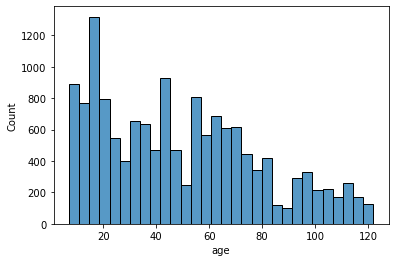

In [49]:
sns.histplot(df_preds_income.age)

In [50]:
sns.residplot(x=df_preds_income.S1901_C01_001E, y=np.log(df_income.price))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 14622 and the array at index 1 has size 21597

In [ ]:
sns.residplot(x=df_preds_income.sqft_living, y=np.log(df_income.price))

In [ ]:
sns.residplot(x=df_preds_income.age, y=np.log(df_income.price))

In [ ]:
age